# Data Analysis of POS transactions

## 1. Import necessary libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load the CSV data into Pandas DataFrames:

In [10]:
pos1_data = pd.read_csv('../data/POS/checkout_1.csv')
pos2_data = pd.read_csv('../data/POS/checkout_2.csv')

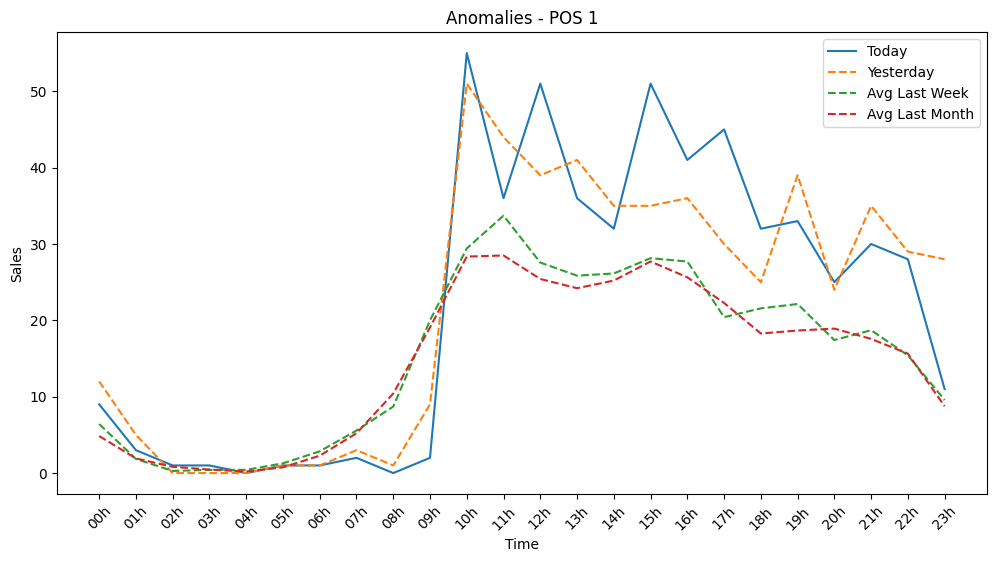

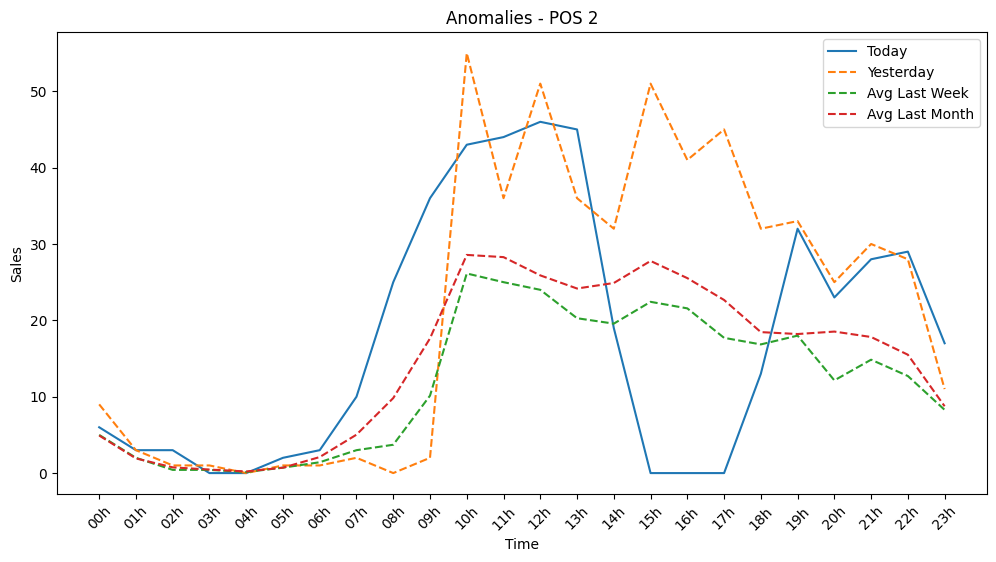

In [14]:
# Analysis Graph - POS 1
plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='today', data=pos1_data, label='Today')
sns.lineplot(x='time', y='yesterday', data=pos1_data, label='Yesterday', linestyle='dashed')
sns.lineplot(x='time', y='avg_last_week', data=pos1_data, label='Avg Last Week', linestyle='dashed')
sns.lineplot(x='time', y='avg_last_month', data=pos1_data, label='Avg Last Month', linestyle='dashed')
plt.title('Anomalies - POS 1')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Analysis Graph - POS 2
plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='today', data=pos2_data, label='Today')
sns.lineplot(x='time', y='yesterday', data=pos2_data, label='Yesterday', linestyle='dashed')
sns.lineplot(x='time', y='avg_last_week', data=pos2_data, label='Avg Last Week', linestyle='dashed')
sns.lineplot(x='time', y='avg_last_month', data=pos2_data, label='Avg Last Month', linestyle='dashed')
plt.title('Anomalies - POS 2')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.show()

We can see through the graphs some anomalies in today's transactions. We will capture these anomalies through pre-defined functions.

## 3. Analyzing Anomalies

Let's create a rule that will detect the anomalies. With a threshold of 50% from today's data compared to all other columns, we can test this rule to see if it works well in our case.

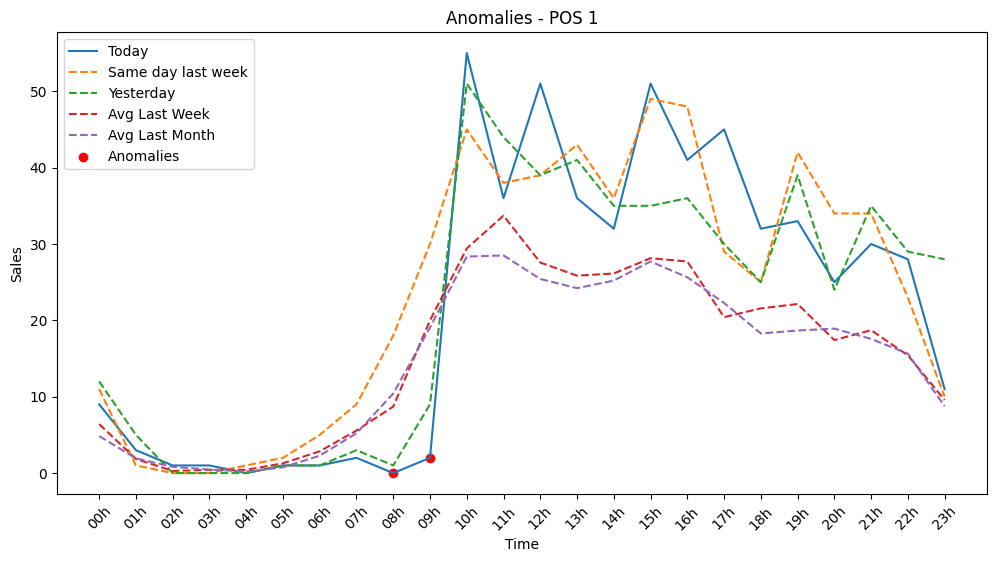

Anomalies - POS 1:
  time  today  yesterday  avg_last_week  avg_last_month
8  08h      0          1           8.71           10.42
9  09h      2          9          20.00           19.07


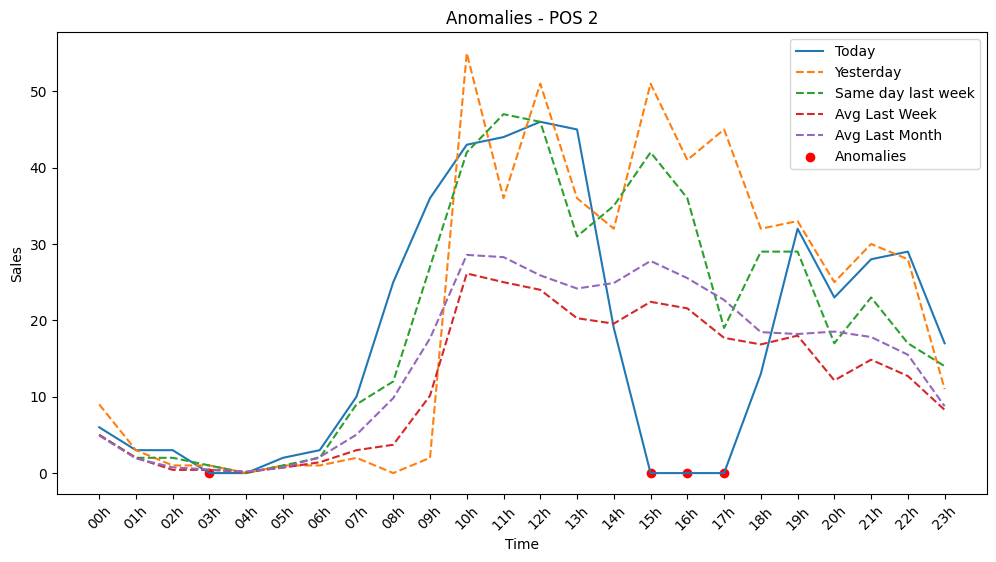


Anomalies - POS 2:
   time  today  yesterday  avg_last_week  avg_last_month
3   03h      0          1          0.420            0.46
15  15h      0         51         22.427           27.78
16  16h      0         41         21.570           25.53
17  17h      0         45         17.710           22.67


In [19]:
# Anomaly Analysis - POS 1
pos1_anomalies = pos1_data[
    (
        (pos1_data['today'] < 0.5 * pos1_data['yesterday'])
    ) &
    (
        (pos1_data['today'] < 0.5 * pos1_data['same_day_last_week'])
    ) &
    (
      (pos1_data['today'] < 0.5 * pos1_data['avg_last_week'])
    ) &
    (
      (pos1_data['today'] < 0.5 * pos1_data['avg_last_month'])
    )
]

# Anomaly Analysis - POS 2
pos2_anomalies = pos2_data[
    (
        (pos2_data['today'] < 0.5 * pos2_data['yesterday'])
    ) &
    (
        (pos2_data['today'] < 0.5 * pos2_data['same_day_last_week'])
    ) &
    (
      (pos2_data['today'] < 0.5 * pos2_data['avg_last_week'])
    ) &
    (
      (pos2_data['today'] < 0.5 * pos2_data['avg_last_month'])
    )
]

# Anomaly Graph - POS 1
plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='today', data=pos1_data, label='Today')
sns.lineplot(x='time', y='same_day_last_week', data=pos1_data, label='Same day last week', linestyle='dashed')
sns.lineplot(x='time', y='yesterday', data=pos1_data, label='Yesterday', linestyle='dashed')
sns.lineplot(x='time', y='avg_last_week', data=pos1_data, label='Avg Last Week', linestyle='dashed')
sns.lineplot(x='time', y='avg_last_month', data=pos1_data, label='Avg Last Month', linestyle='dashed')
plt.scatter(x=pos1_anomalies['time'], y=pos1_anomalies['today'], color='red', label='Anomalies')
plt.title('Anomalies - POS 1')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Anomaly Table - POS 1
if not pos1_anomalies.empty:
    print("Anomalies - POS 1:")
    print(pos1_anomalies[['time', 'today', 'yesterday', 'avg_last_week', 'avg_last_month']])
else:
    print("No anomalies found - POS 1")

# Anomaly Graph - POS 2
plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='today', data=pos2_data, label='Today')
sns.lineplot(x='time', y='yesterday', data=pos2_data, label='Yesterday', linestyle='dashed')
sns.lineplot(x='time', y='same_day_last_week', data=pos2_data, label='Same day last week', linestyle='dashed')
sns.lineplot(x='time', y='avg_last_week', data=pos2_data, label='Avg Last Week', linestyle='dashed')
sns.lineplot(x='time', y='avg_last_month', data=pos2_data, label='Avg Last Month', linestyle='dashed')
plt.scatter(x=pos2_anomalies['time'], y=pos2_anomalies['today'], color='red', label='Anomalies')
plt.title('Anomalies - POS 2')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Anomaly Table - POS 2
if not pos2_anomalies.empty:
    print("\nAnomalies - POS 2:")
    print(pos2_anomalies[['time', 'today', 'yesterday', 'avg_last_week', 'avg_last_month']])
else:
    print("\nNo anomalies found - POS 2")

As we can see, the point 3 in the second graph seems to be a false anomaly. Lets correct that by assuming average last month to be higher than one.

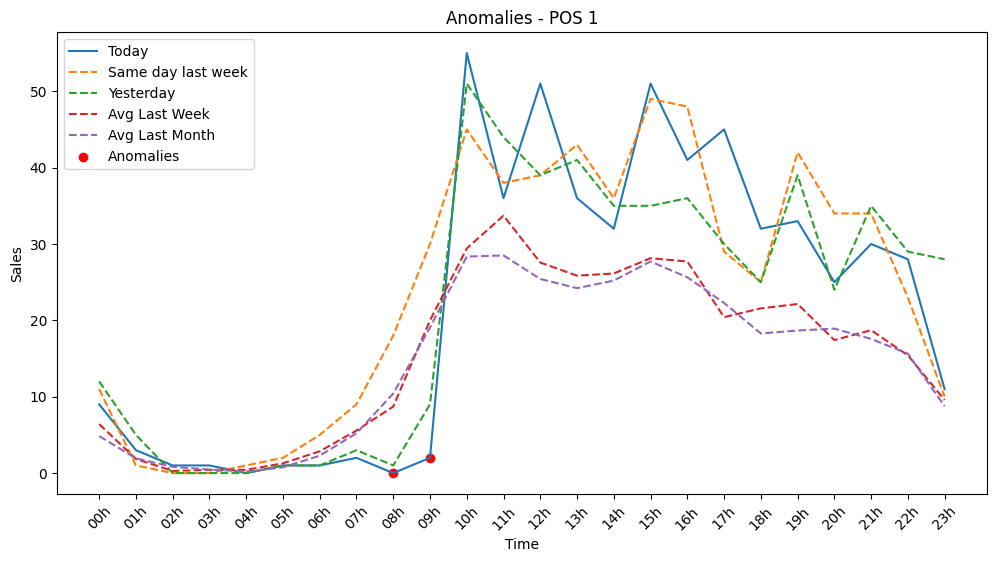

Anomalies - POS 1:
  time  today  yesterday  avg_last_week  avg_last_month
8  08h      0          1           8.71           10.42
9  09h      2          9          20.00           19.07


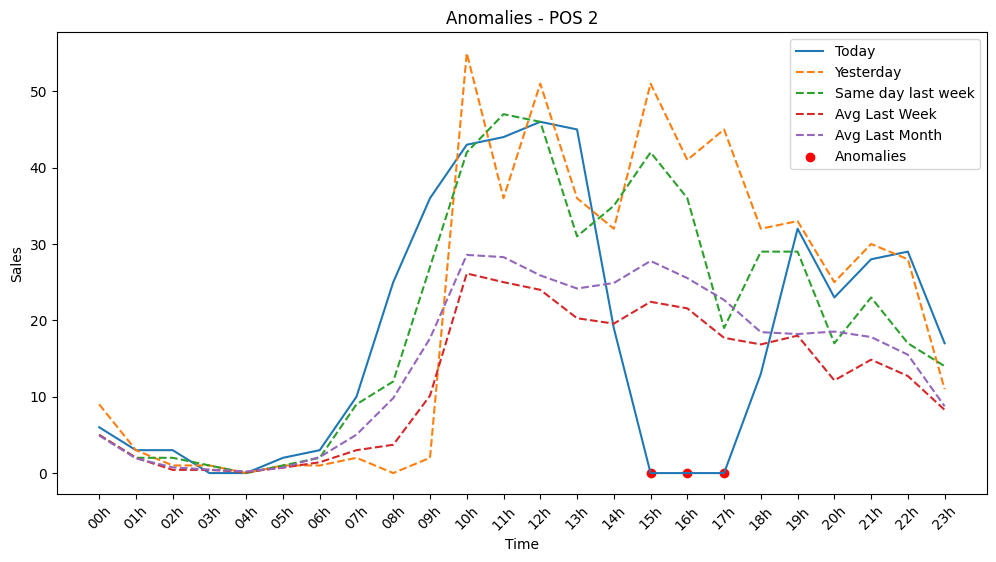


Anomalies - POS 2:
   time  today  yesterday  avg_last_week  avg_last_month
15  15h      0         51         22.427           27.78
16  16h      0         41         21.570           25.53
17  17h      0         45         17.710           22.67


In [21]:
# Anomaly Analysis - POS 1
pos1_anomalies = pos1_data[
    (
        (pos1_data['today'] < 0.5 * pos1_data['yesterday'])
    ) &
    (
        (pos1_data['today'] < 0.5 * pos1_data['same_day_last_week'])
    ) &
    (
      (pos1_data['today'] < 0.5 * pos1_data['avg_last_week'])
    ) &
    (
      (pos1_data['today'] < 0.5 * pos1_data['avg_last_month'])
    ) &
    (
        (pos1_data['avg_last_month'] > 1)
    )
]

# Anomaly Analysis - POS 2
pos2_anomalies = pos2_data[
    (
        (pos2_data['today'] < 0.5 * pos2_data['yesterday'])
    ) &
    (
        (pos2_data['today'] < 0.5 * pos2_data['same_day_last_week'])
    ) &
    (
      (pos2_data['today'] < 0.5 * pos2_data['avg_last_week'])
    ) &
    (
      (pos2_data['today'] < 0.5 * pos2_data['avg_last_month'])
    ) &
    (
        (pos2_data['avg_last_month'] > 1)
    )
]

# Anomaly Graph - POS 1
plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='today', data=pos1_data, label='Today')
sns.lineplot(x='time', y='same_day_last_week', data=pos1_data, label='Same day last week', linestyle='dashed')
sns.lineplot(x='time', y='yesterday', data=pos1_data, label='Yesterday', linestyle='dashed')
sns.lineplot(x='time', y='avg_last_week', data=pos1_data, label='Avg Last Week', linestyle='dashed')
sns.lineplot(x='time', y='avg_last_month', data=pos1_data, label='Avg Last Month', linestyle='dashed')
plt.scatter(x=pos1_anomalies['time'], y=pos1_anomalies['today'], color='red', label='Anomalies')
plt.title('Anomalies - POS 1')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Anomaly Table - POS 1
if not pos1_anomalies.empty:
    print("Anomalies - POS 1:")
    print(pos1_anomalies[['time', 'today', 'yesterday', 'avg_last_week', 'avg_last_month']])
else:
    print("No anomalies found - POS 1")

# Anomaly Graph - POS 2
plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='today', data=pos2_data, label='Today')
sns.lineplot(x='time', y='yesterday', data=pos2_data, label='Yesterday', linestyle='dashed')
sns.lineplot(x='time', y='same_day_last_week', data=pos2_data, label='Same day last week', linestyle='dashed')
sns.lineplot(x='time', y='avg_last_week', data=pos2_data, label='Avg Last Week', linestyle='dashed')
sns.lineplot(x='time', y='avg_last_month', data=pos2_data, label='Avg Last Month', linestyle='dashed')
plt.scatter(x=pos2_anomalies['time'], y=pos2_anomalies['today'], color='red', label='Anomalies')
plt.title('Anomalies - POS 2')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Anomaly Table - POS 2
if not pos2_anomalies.empty:
    print("\nAnomalies - POS 2:")
    print(pos2_anomalies[['time', 'today', 'yesterday', 'avg_last_week', 'avg_last_month']])
else:
    print("\nNo anomalies found - POS 2")

## 4. SQL Queries

``` mysql
-- SQL Query - POS 1
    WITH AnomalyCTE AS (
      SELECT
        time,
        today as anomalies,
        CASE
          WHEN (today < 0.5 * yesterday) AND
               (today < 0.5 * same_day_last_week) AND
               (today < 0.5 * avg_last_week) AND
               (today < 0.5 * avg_last_month) AND
               (avg_last_month > 1)
          THEN 'Anomaly'
          ELSE 'Normal'
        END AS anomaly_status
      FROM
        checkout_1
    )

    SELECT
      time,
      anomalies,
      anomaly_status
    FROM
      AnomalyCTE
    WHERE
      anomaly_status = 'Anomaly';
    '''

-- SQL Query - POS 2
    WITH AnomalyCTE AS (
      SELECT
        time,
        today as anomalies,
        CASE
          WHEN (today < 0.5 * yesterday) AND
               (today < 0.5 * same_day_last_week) AND
               (today < 0.5 * avg_last_week) AND
               (today < 0.5 * avg_last_month) AND
               (avg_last_month > 1)
          THEN 'Anomaly'
          ELSE 'Normal'
        END AS anomaly_status
      FROM
        checkout_2
    )

    SELECT
      time,
      anomalies,
      anomaly_status
    FROM
      AnomalyCTE
    WHERE
      anomaly_status = 'Anomaly';
